# TensorFlow 2 functions and graphs

- We will look at how to move between python function and tf.function s. 
- Look at how tensorflow functions are formed using graphs composed simplified components, which makes efficient computations and backpropogations.


In [4]:
import tensorflow as tf

## Python vs tf.function
We start by looking at different between python and TF functions.

In [5]:
#Python function
def cube(x):
    return x ** 3

In [6]:
cube(2)

8

In [10]:
tf_cube = tf.function(cube)
type(tf_cube)

tensorflow.python.eager.def_function.Function

### tf.function behaves very similar to python functions

In [12]:
tf_cube(3) #give similar results as cube(tf.constant(3))

<tf.Tensor: shape=(), dtype=int32, numpy=27>

In [15]:
tf_cube(tf.constant(3))

<tf.Tensor: shape=(), dtype=int32, numpy=27>

#### Converting tensorboard function to python function

In [20]:
python_cube = tf_cube.python_function
python_cube(2)

8

### Using decorator '@' to define tf function directly 

In [22]:
@tf.function
def tf_cube_2(x):
    return x**3

tf_cube(3.0)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

### Keras automatically converts all the function fed to it, to tf.function

 But You can tell Keras not to convert your Python functions to TF Functions by setting dynamic=True when creating a custom layer or a custom model. Alternatively, you can set run_eagerly=True when calling the model’s compile() method.

By default, a TF Function generates a new graph for every unique set of input shapes and data types and caches it for subsequent calls. For example, if you call tf_cube(tf.constant(10)), a graph will be generated for int32 tensors of shape []. Then if you call tf_cube(tf.constant(20)), the same graph will be reused. But if you then call tf_cube(tf.constant([10, 20])), a new graph will be generated for int32 tensors of shape [2]. This is how TF Functions handle polymorphism (i.e., varying argument types and shapes). However, this is only true for tensor arguments: if you pass numerical Python values to a TF Function, a new graph will be generated for every distinct value: for example, calling tf_cube(10) and tf_cube(20) will generate two graphs.

## Auto graph and Tracing 

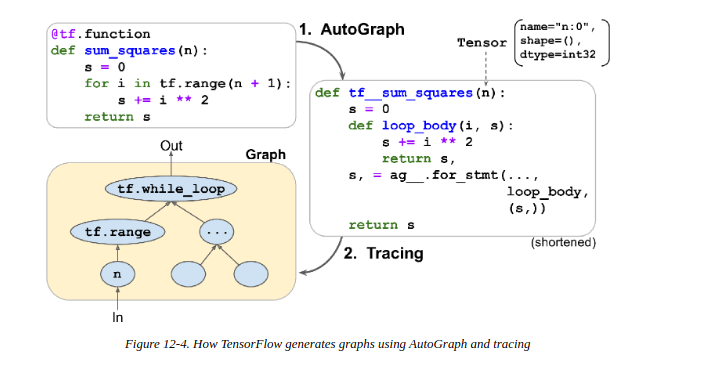

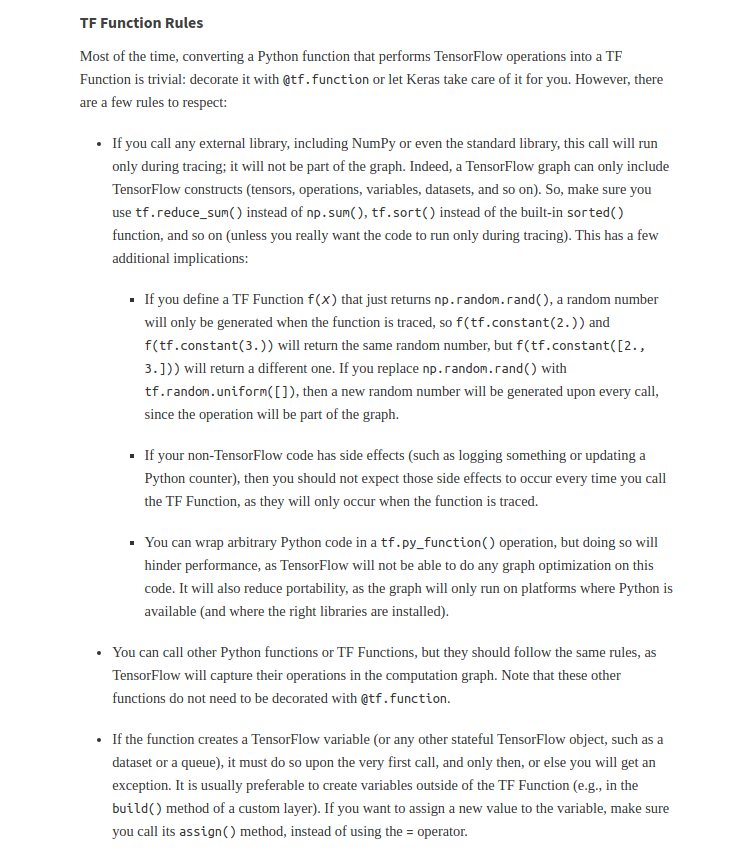

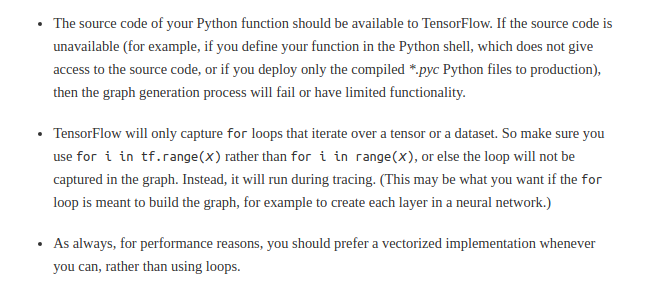